In [1]:
!git clone https://github.com/ej0cl6/deep-active-learning.git
!cd deep-active-learning

Cloning into 'deep-active-learning'...
remote: Enumerating objects: 232, done.
remote: Total 232 (delta 0), reused 0 (delta 0), pack-reused 232
Receiving objects: 100% (232/232), 44.12 KiB | 740.00 KiB/s, done.
Resolving deltas: 100% (141/141), done.


In [2]:
import sys
sys.path.append('/content/deep-active-learning')
sys.path.append('/content/deep-active-learning/query_strategies')

In [3]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
from torchvision import datasets
import matplotlib.pyplot as plt

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [11]:
dataset = get_dataset('MNIST')                   # load dataset
net = get_net('MNIST', device)                   # load network
#strategy = get_strategy('LeastConfidence')(dataset, net)

In [12]:
np.unique(dataset.Y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([3924, 4563, 3943, 4081, 3909, 3604, 3975, 4125, 3860, 4016]))

In [13]:
dataset.X_train.shape ,dataset.Y_train.shape

(torch.Size([40000, 28, 28]), torch.Size([40000]))

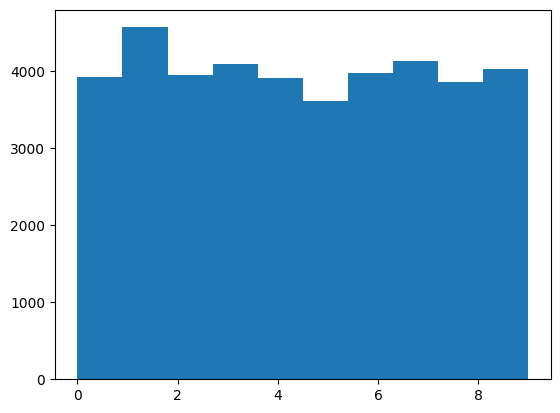

In [14]:
plt.hist(dataset.Y_train);

In [15]:
net.params['n_epoch'] = 10

In [16]:
def cal_training_acc(preds):
        return 1.0 * (dataset.Y_train==preds).sum().item() / dataset.n_pool

##**Uncertainty sampling (Least Confidence) strategy**


In [17]:
strategy = get_strategy('LeastConfidence')(dataset, net)

In [18]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [19]:
Test_acc_uncertainty_based_Least_Confidence_Sampling = []

In [20]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Least_Confidence_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.48s/it]


Round 1 training accuracy: 0.948875
Round 1 testing accuracy: 0.9536


In [21]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Least_Confidence_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.32s/it]


Round 2 training accuracy: 0.951325
Round 2 testing accuracy: 0.954
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.85s/it]


Round 3 training accuracy: 0.960675
Round 3 testing accuracy: 0.9632
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.30s/it]


Round 4 training accuracy: 0.9607
Round 4 testing accuracy: 0.964
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.24s/it]


Round 5 training accuracy: 0.95915
Round 5 testing accuracy: 0.9614
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.24s/it]


Round 6 training accuracy: 0.9676
Round 6 testing accuracy: 0.9679
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.30s/it]


Round 7 training accuracy: 0.96085
Round 7 testing accuracy: 0.9636
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.41s/it]


Round 8 training accuracy: 0.9605
Round 8 testing accuracy: 0.96
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.41s/it]


Round 9 training accuracy: 0.96795
Round 9 testing accuracy: 0.9674
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.43s/it]


Round 10 training accuracy: 0.964525
Round 10 testing accuracy: 0.9661
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [00:59<00:00,  5.95s/it]


Round 11 training accuracy: 0.9675
Round 11 testing accuracy: 0.9674
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [00:55<00:00,  5.53s/it]


Round 12 training accuracy: 0.968275
Round 12 testing accuracy: 0.9701
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.67s/it]


Round 13 training accuracy: 0.96485
Round 13 testing accuracy: 0.966
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [00:56<00:00,  5.62s/it]


Round 14 training accuracy: 0.9657
Round 14 testing accuracy: 0.9663
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.81s/it]


Round 15 training accuracy: 0.969925
Round 15 testing accuracy: 0.9715


##**Uncertainty sampling (Entropy Sampling Dropout) strategy**

In [22]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [23]:
strategy = get_strategy('EntropySamplingDropout')(dataset, net)

In [24]:
Test_acc_uncertainty_based_Entropy_Sampling = []

In [25]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Entropy_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [01:33<00:00,  9.39s/it]


Round 1 training accuracy: 0.9741
Round 1 testing accuracy: 0.9748


In [26]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Entropy_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.48s/it]


Round 2 training accuracy: 0.973525
Round 2 testing accuracy: 0.9741
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.41s/it]


Round 3 training accuracy: 0.97285
Round 3 testing accuracy: 0.9724
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [01:34<00:00,  9.48s/it]


Round 4 training accuracy: 0.973225
Round 4 testing accuracy: 0.9757
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.73s/it]


Round 5 training accuracy: 0.9759
Round 5 testing accuracy: 0.9764
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.73s/it]


Round 6 training accuracy: 0.975825
Round 6 testing accuracy: 0.9733
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [01:36<00:00,  9.61s/it]


Round 7 training accuracy: 0.97525
Round 7 testing accuracy: 0.9749
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.77s/it]


Round 8 training accuracy: 0.97125
Round 8 testing accuracy: 0.9717
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.79s/it]


Round 9 training accuracy: 0.97515
Round 9 testing accuracy: 0.9758
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.75s/it]


Round 10 training accuracy: 0.9747
Round 10 testing accuracy: 0.974
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [01:41<00:00, 10.12s/it]


Round 11 training accuracy: 0.97445
Round 11 testing accuracy: 0.9734
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [01:40<00:00, 10.02s/it]


Round 12 training accuracy: 0.973925
Round 12 testing accuracy: 0.9758
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [01:40<00:00, 10.04s/it]


Round 13 training accuracy: 0.975625
Round 13 testing accuracy: 0.9761
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [01:41<00:00, 10.10s/it]


Round 14 training accuracy: 0.975875
Round 14 testing accuracy: 0.9755
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [01:40<00:00, 10.05s/it]


Round 15 training accuracy: 0.97665
Round 15 testing accuracy: 0.9765


##**Uncertainty sampling (Margin Sampling) strategy**


In [27]:
# start experiment
init = 10000
dataset.initialize_labels(init)
print(f"number of labeled pool: {init}")
print(f"number of unlabeled pool: {dataset.n_pool-init}")
print(f"number of testing pool: {dataset.n_test}")
print()

number of labeled pool: 10000
number of unlabeled pool: 30000
number of testing pool: 10000



In [28]:
strategy = get_strategy('MarginSampling')(dataset, net)

In [29]:
Test_acc_uncertainty_based_Margin_Sampling = []

In [30]:
# round 1 accuracy
print("Round 1")
strategy.train()
# no. Epoch is 10
preds = strategy.predict(dataset.get_train_data()[1])
print(f"Round 1 training accuracy: {cal_training_acc(preds)}")

preds = strategy.predict(dataset.get_test_data())
print(f"Round 1 testing accuracy: {dataset.cal_test_acc(preds)}")
Test_acc_uncertainty_based_Margin_Sampling.append(dataset.cal_test_acc(preds))

Round 1


100%|███████████████████████████████████████████████████████████████| 10/10 [02:07<00:00, 12.75s/it]


Round 1 training accuracy: 0.976475
Round 1 testing accuracy: 0.9768


In [31]:
for rd in range(2, 16):
    print(f"Round {rd}")

    # query
    query_idxs = strategy.query(100)

    # update labels
    strategy.update(query_idxs)
    strategy.train()

    # calculate accuracy on test and training
    preds = strategy.predict(dataset.get_train_data()[1])
    print(f"Round {rd} training accuracy: {cal_training_acc(preds)}")

    preds = strategy.predict(dataset.get_test_data())
    print(f"Round {rd} testing accuracy: {dataset.cal_test_acc(preds)}")
    Test_acc_uncertainty_based_Margin_Sampling.append(dataset.cal_test_acc(preds))

Round 2


100%|███████████████████████████████████████████████████████████████| 10/10 [02:05<00:00, 12.53s/it]


Round 2 training accuracy: 0.9006
Round 2 testing accuracy: 0.9002
Round 3


100%|███████████████████████████████████████████████████████████████| 10/10 [02:07<00:00, 12.74s/it]


Round 3 training accuracy: 0.97925
Round 3 testing accuracy: 0.9787
Round 4


100%|███████████████████████████████████████████████████████████████| 10/10 [02:07<00:00, 12.72s/it]


Round 4 training accuracy: 0.98045
Round 4 testing accuracy: 0.9792
Round 5


100%|███████████████████████████████████████████████████████████████| 10/10 [02:08<00:00, 12.82s/it]


Round 5 training accuracy: 0.978625
Round 5 testing accuracy: 0.9786
Round 6


100%|███████████████████████████████████████████████████████████████| 10/10 [02:08<00:00, 12.89s/it]


Round 6 training accuracy: 0.97825
Round 6 testing accuracy: 0.9788
Round 7


100%|███████████████████████████████████████████████████████████████| 10/10 [02:10<00:00, 13.03s/it]


Round 7 training accuracy: 0.9776
Round 7 testing accuracy: 0.9771
Round 8


100%|███████████████████████████████████████████████████████████████| 10/10 [02:10<00:00, 13.07s/it]


Round 8 training accuracy: 0.977225
Round 8 testing accuracy: 0.9767
Round 9


100%|███████████████████████████████████████████████████████████████| 10/10 [02:12<00:00, 13.23s/it]


Round 9 training accuracy: 0.978925
Round 9 testing accuracy: 0.9783
Round 10


100%|███████████████████████████████████████████████████████████████| 10/10 [02:13<00:00, 13.36s/it]


Round 10 training accuracy: 0.97675
Round 10 testing accuracy: 0.9782
Round 11


100%|███████████████████████████████████████████████████████████████| 10/10 [02:13<00:00, 13.32s/it]


Round 11 training accuracy: 0.9805
Round 11 testing accuracy: 0.9793
Round 12


100%|███████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.57s/it]


Round 12 training accuracy: 0.9753
Round 12 testing accuracy: 0.9753
Round 13


100%|███████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.58s/it]


Round 13 training accuracy: 0.976675
Round 13 testing accuracy: 0.9775
Round 14


100%|███████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.56s/it]


Round 14 training accuracy: 0.979525
Round 14 testing accuracy: 0.9788
Round 15


100%|███████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.51s/it]


Round 15 training accuracy: 0.980275
Round 15 testing accuracy: 0.9804


##**Comparing results**

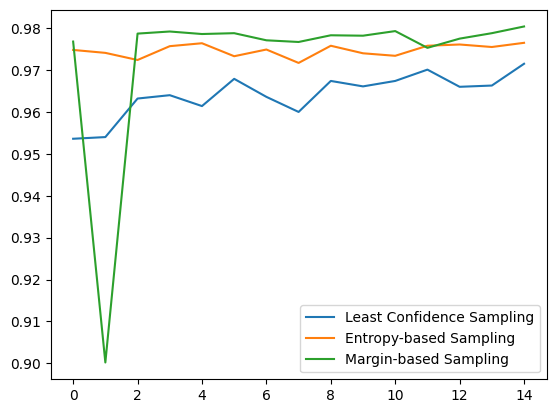

In [32]:
plt.plot(Test_acc_uncertainty_based_Least_Confidence_Sampling, label = 'Least Confidence Sampling')
plt.plot(Test_acc_uncertainty_based_Entropy_Sampling, label = 'Entropy-based Sampling')
plt.plot(Test_acc_uncertainty_based_Margin_Sampling, label = 'Margin-based Sampling')
plt.legend()
plt.show()